# Notebook for Final Project

## Package Import

In [7]:
# Basic
import numpy as np # linear algebra
import scipy as sp
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Plot
import matplotlib.pyplot as plt
import seaborn as sns

## Data Exploration and Preprocessing

Read data and look at the variables we have

In [16]:
# Import Data
df = pd.read_json("../data/train.json")

In [17]:
print df.shape

(49352, 15)


In [18]:
# Look at the first few rows
df.head()

,bathrooms,bedrooms,building_id,created,description,display_address,features,interest_level,latitude,listing_id,longitude,manager_id,photos,price,street_address
10,1.5,3,53a5b119ba8f7b61d4e010512e0dfc85,2016-06-24 07:54:24,A Brand New 3 Bedroom 1.5 bath ApartmentEnjoy ...,Metropolitan Avenue,[],medium,40.7145,7211212,-73.9425,5ba989232d0489da1b5f2c45f6688adc,[https://photos.renthop.com/2/7211212_1ed4542e...,3000,792 Metropolitan Avenue
10000,1.0,2,c5c8a357cba207596b04d1afd1e4f130,2016-06-12 12:19:27,,Columbus Avenue,"[Doorman, Elevator, Fitness Center, Cats Allow...",low,40.7947,7150865,-73.9667,7533621a882f71e25173b27e3139d83d,[https://photos.renthop.com/2/7150865_be3306c5...,5465,808 Columbus Avenue
100004,1.0,1,c3ba40552e2120b0acfc3cb5730bb2aa,2016-04-17 03:26:41,"Top Top West Village location, beautiful Pre-w...",W 13 Street,"[Laundry In Building, Dishwasher, Hardwood Flo...",high,40.7388,6887163,-74.0018,d9039c43983f6e564b1482b273bd7b01,[https://photos.renthop.com/2/6887163_de85c427...,2850,241 W 13 Street
100007,1.0,1,28d9ad350afeaab8027513a3e52ac8d5,2016-04-18 02:22:02,Building Amenities - Garage - Garden - fitness...,East 49th Street,"[Hardwood Floors, No Fee]",low,40.7539,6888711,-73.9677,1067e078446a7897d2da493d2f741316,[https://photos.renthop.com/2/6888711_6e660cee...,3275,333 East 49th Street
100013,1.0,4,0,2016-04-28 01:32:41,Beautifully renovated 3 bedroom flex 4 bedroom...,West 143rd Street,[Pre-War],low,40.8241,6934781,-73.9493,98e13ad4b495b9613cef886d79a6291f,[https://photos.renthop.com/2/6934781_1fa4b41a...,3350,500 West 143rd Street


Retrieve Target Variable

In [27]:
df_y = df[['price']]
df_X = df.drop('price',axis=1)

Select Numeric Data

In [29]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
df_numeric = df_X.select_dtypes(include=numerics)
df_numeric.head()

,bathrooms,bedrooms,latitude,listing_id,longitude
10,1.5,3,40.7145,7211212,-73.9425
10000,1.0,2,40.7947,7150865,-73.9667
100004,1.0,1,40.7388,6887163,-74.0018
100007,1.0,1,40.7539,6888711,-73.9677
100013,1.0,4,40.8241,6934781,-73.9493


Select Text Data

In [32]:
df_string = df_X.select_dtypes(include=['object'])
df_string.head()

,building_id,created,description,display_address,features,interest_level,manager_id,photos,street_address
10,53a5b119ba8f7b61d4e010512e0dfc85,2016-06-24 07:54:24,A Brand New 3 Bedroom 1.5 bath ApartmentEnjoy ...,Metropolitan Avenue,[],medium,5ba989232d0489da1b5f2c45f6688adc,[https://photos.renthop.com/2/7211212_1ed4542e...,792 Metropolitan Avenue
10000,c5c8a357cba207596b04d1afd1e4f130,2016-06-12 12:19:27,,Columbus Avenue,"[Doorman, Elevator, Fitness Center, Cats Allow...",low,7533621a882f71e25173b27e3139d83d,[https://photos.renthop.com/2/7150865_be3306c5...,808 Columbus Avenue
100004,c3ba40552e2120b0acfc3cb5730bb2aa,2016-04-17 03:26:41,"Top Top West Village location, beautiful Pre-w...",W 13 Street,"[Laundry In Building, Dishwasher, Hardwood Flo...",high,d9039c43983f6e564b1482b273bd7b01,[https://photos.renthop.com/2/6887163_de85c427...,241 W 13 Street
100007,28d9ad350afeaab8027513a3e52ac8d5,2016-04-18 02:22:02,Building Amenities - Garage - Garden - fitness...,East 49th Street,"[Hardwood Floors, No Fee]",low,1067e078446a7897d2da493d2f741316,[https://photos.renthop.com/2/6888711_6e660cee...,333 East 49th Street
100013,0,2016-04-28 01:32:41,Beautifully renovated 3 bedroom flex 4 bedroom...,West 143rd Street,[Pre-War],low,98e13ad4b495b9613cef886d79a6291f,[https://photos.renthop.com/2/6934781_1fa4b41a...,500 West 143rd Street


## Feature Extraction

## Feature Selection

## Construct Training Set

In [36]:
X_train = df_numeric.values # Use numeric data as features
y_train = df_y.values # Target Variable: price

## Modeling

### Simplest Model: Linear Regression with L1-Regularization

In [38]:
# Import models
from sklearn.linear_model import Lasso
ls =Lasso(alpha=0.1)
ls.fit(X_train, y_train)

Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

### Cross Validation

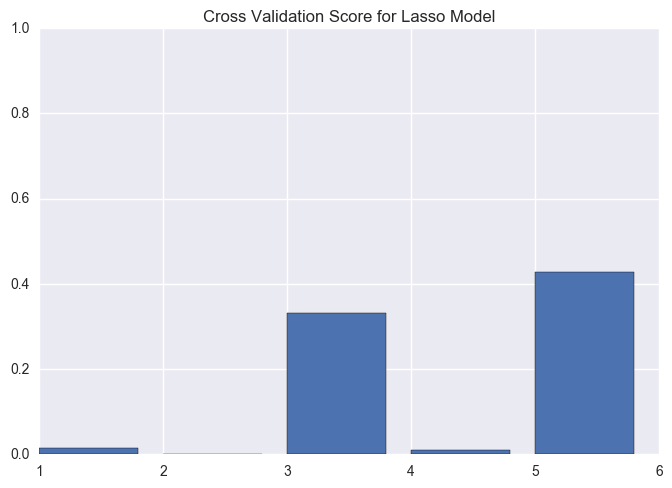

In [56]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(ls, X_train, y_train, cv=5)
plt.bar(np.arange(1,6), scores)
plt.title('Cross Validation Score for Lasso Model')
plt.xlim(1,6)
plt.ylim(0,1)
plt.show()

## Evaluation

## Deployment